In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='fruits.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('fruits.zip')
f.keys()
!unzip fruits.zip

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
TRAIN_DIR = '/content/fruits/train'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import matplotlib.pyplot as plt

In [ ]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

valid_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 310 images belonging to 5 classes.
Found 74 images belonging to 5 classes.


In [ ]:
model = Sequential()

model.add(L.Conv2D(64, (5, 5), activation='relu', padding='Same', input_shape=(100, 100, 3)))
model.add(L.Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(L.MaxPool2D((2, 2)))
model.add(L.Dropout(0.25))

model.add(L.Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(L.Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(L.MaxPool2D((2, 2), strides=(2, 2)))
model.add(L.Dropout(0.25))

model.add(L.Flatten())
model.add(L.Dense(256, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(5, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
            
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                    callbacks=[early],
                   epochs=10)

Epoch 1/10
9/9 [==============================] - 25s 3s/step - loss: 1.0751 - accuracy: 0.5764 - val_loss: 0.9695 - val_accuracy: 0.5781
Epoch 2/10
9/9 [==============================] - 23s 3s/step - loss: 1.0754 - accuracy: 0.5576 - val_loss: 1.1992 - val_accuracy: 0.3906
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 1.0903 - accuracy: 0.5827 - val_loss: 1.1119 - val_accuracy: 0.5156
Epoch 4/10
9/9 [==============================] - 18s 2s/step - loss: 0.8919 - accuracy: 0.6583 - val_loss: 0.7885 - val_accuracy: 0.6719
Epoch 5/10
9/9 [==============================] - 18s 2s/step - loss: 0.9056 - accuracy: 0.6547 - val_loss: 0.7926 - val_accuracy: 0.7031
Epoch 6/10
9/9 [==============================] - 17s 2s/step - loss: 0.9109 - accuracy: 0.6367 - val_loss: 0.9063 - val_accuracy: 0.5938
Epoch 7/10
9/9 [==============================] - 19s 2s/step - loss: 0.8469 - accuracy: 0.6547 - val_loss: 0.9061 - val_accuracy: 0.6406
Epoch 8/10
9/9 [==================

Accuracy:  0.6582733988761902


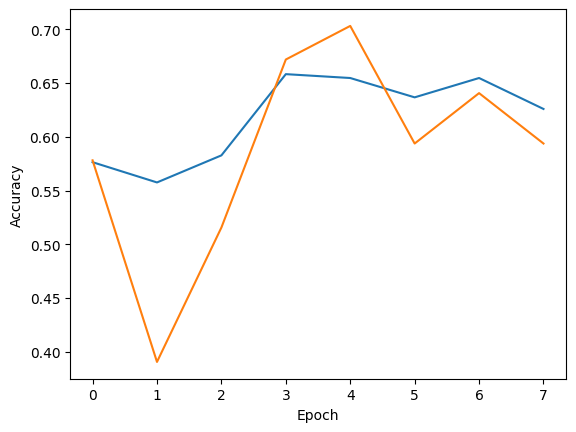

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()